# Neural Network Visualization Demo with 2-Layer Network

This notebook demonstrates the visualization capabilities of the Neural Network implementation.
We'll train a simple 2-layer network and visualize its parameters during training.

In [12]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
import sys
sys.path.append('../..')

from Helpers.NeuralNetwork import NeuralNetwork

from Data import DatasetClasses

from Helpers import Helpers
from Layers.FullyConnected import FullyConnected
from Layers.Activations import ReLU, SoftMax
from Layers.Flatten import Flatten
from Layers.Initializers import He, Constant

from Optimization.Optimizers import Sgd
from Optimization.Loss import CrossEntropyLoss
from Optimization.Constraints import L2_Regularizer

## 1. Load MNIST Dataset

We'll use a small batch size for faster training


dataset Informations:
--------------------------------------------------
Training samples: 45500
Sample shape: (1, 28, 28)
Number of classes: 10
Test samples: 14000
Dataset size in memory: 355.90 MB


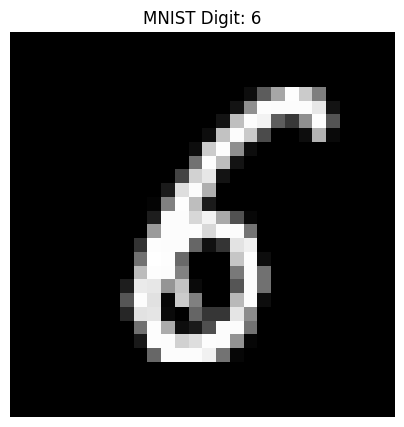

In [13]:
batch_size = 128
mnist = DatasetClasses.MNISTData(batch_size)
mnist.print_dataset_info()

## 2. Create a Simple 2-Layer Neural Network

We'll create a simple network with:
- A flattening layer to convert images to vectors
- A fully connected layer with a small number of hidden units (32)
- ReLU activation
- A fully connected output layer (10 classes)
- SoftMax activation

In [14]:
def build_2layer_network():
    # Create optimizer
    learning_rate = 0.0003   # Learning rate for SGD: if big value: diverges
    optimizer = Sgd(learning_rate)
    regularizer = L2_Regularizer(alpha=0.0001)  # Light regularization
    optimizer.add_regularizer(regularizer)
    
    # Initialize the network with He initialization for weights
    weights_initializer = He()
    bias_initializer = Constant(0.1)  # Small constant for bias initialization
    net = NeuralNetwork(optimizer, weights_initializer, bias_initializer)
    
    # Add layers
    net.append_layer(Flatten())  # Flatten the 28x28 images to 784-dimensional vectors
    net.append_layer(FullyConnected(784, 32))  # First fully connected layer: 784 -> 32
    net.append_layer(ReLU())  # ReLU activation
    net.append_layer(FullyConnected(32, 10))  # Output layer: 32 -> 10 (one for each digit)
    net.append_layer(SoftMax())  # SoftMax activation for classification
    
    # Set loss function
    net.loss_layer = CrossEntropyLoss()
    
    return net

## 3. Visualize Initial Network

Let's visualize the network before training

Network structure:
Layer 0: Flatten (non-trainable)
Layer 1: FullyConnected (trainable)
Layer 2: ReLU (non-trainable)
Layer 3: FullyConnected (trainable)
Layer 4: SoftMax (non-trainable)


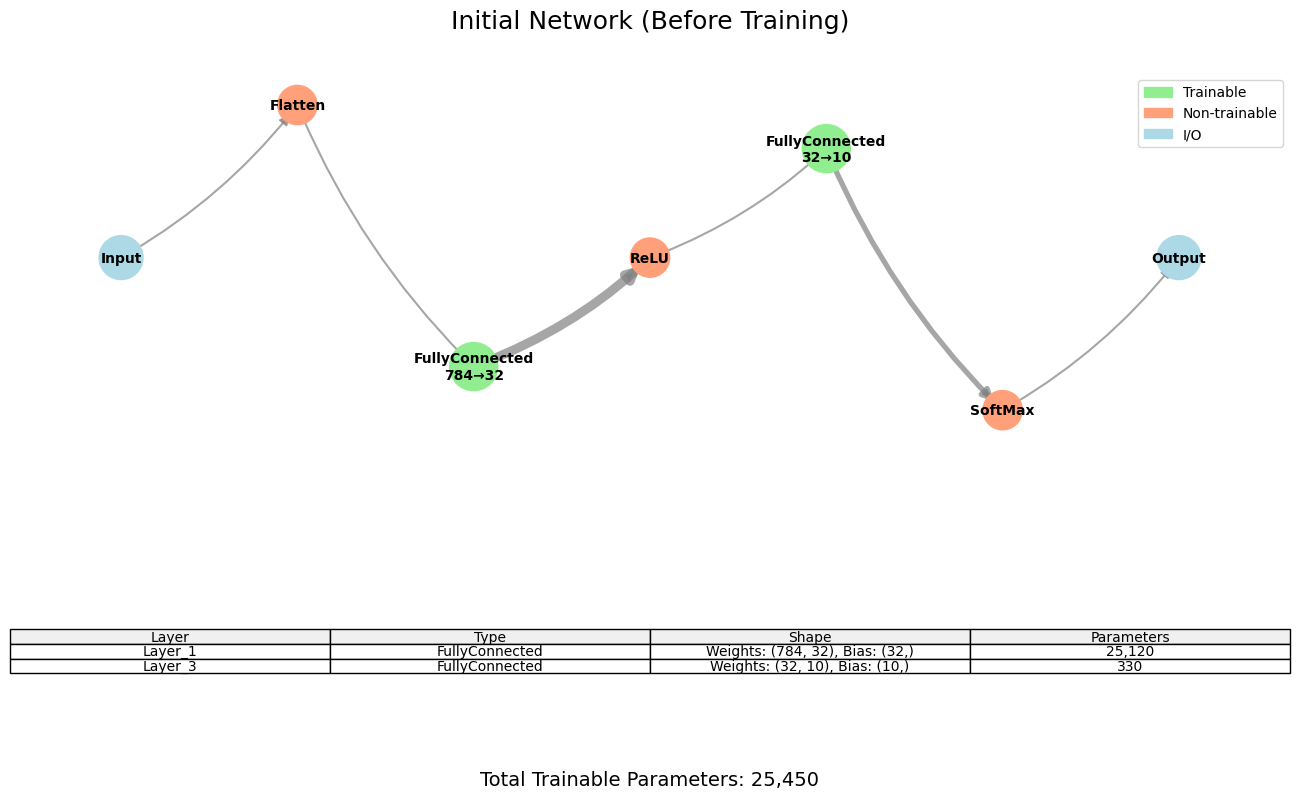

In [15]:
# Build the network
net = build_2layer_network()
net.data_layer = mnist

# Print network structure
print("Network structure:")
for i, layer in enumerate(net.layers):
    trainable_status = "(trainable)" if layer.trainable else "(non-trainable)"
    print(f"Layer {i}: {layer.__class__.__name__} {trainable_status}")

# Visualize the initial network
fig = net.plot(title="Initial Network (Before Training)")

## 4. Train the Network with Visualization

We'll train the network for 100 iterations, visualizing the parameters every 20 iterations

Détection automatique du type de problème: classification (basé sur CrossEntropyLoss)
Validation set detected and will be used for display.
 Iteration |         Loss |  Train Acc (%) |  Val Acc (%) | Elapsed Time
-----------------------------------------------------------------
         0 |   319.584800 |          13.70 |        11.90 | 0.02s
      1000 |    38.134114 |          90.20 |        92.30 | 4.81s
      2000 |    20.291847 |          91.80 |        92.70 | 9.93s
      3000 |    28.880770 |          92.60 |        93.20 | 15.58s
      4000 |    22.872613 |          94.80 |        93.50 | 21.11s
      5000 |    12.282956 |          95.00 |        94.00 | 27.06s
      6000 |    15.649519 |          94.10 |        93.70 | 33.29s
      7000 |    12.590801 |          95.10 |        94.90 | 39.39s
      8000 |    17.135256 |          95.00 |        94.40 | 44.63s
      9000 |    24.263214 |          96.50 |        93.50 | 51.81s
      9999 |     9.975300 |          95.40 |        94

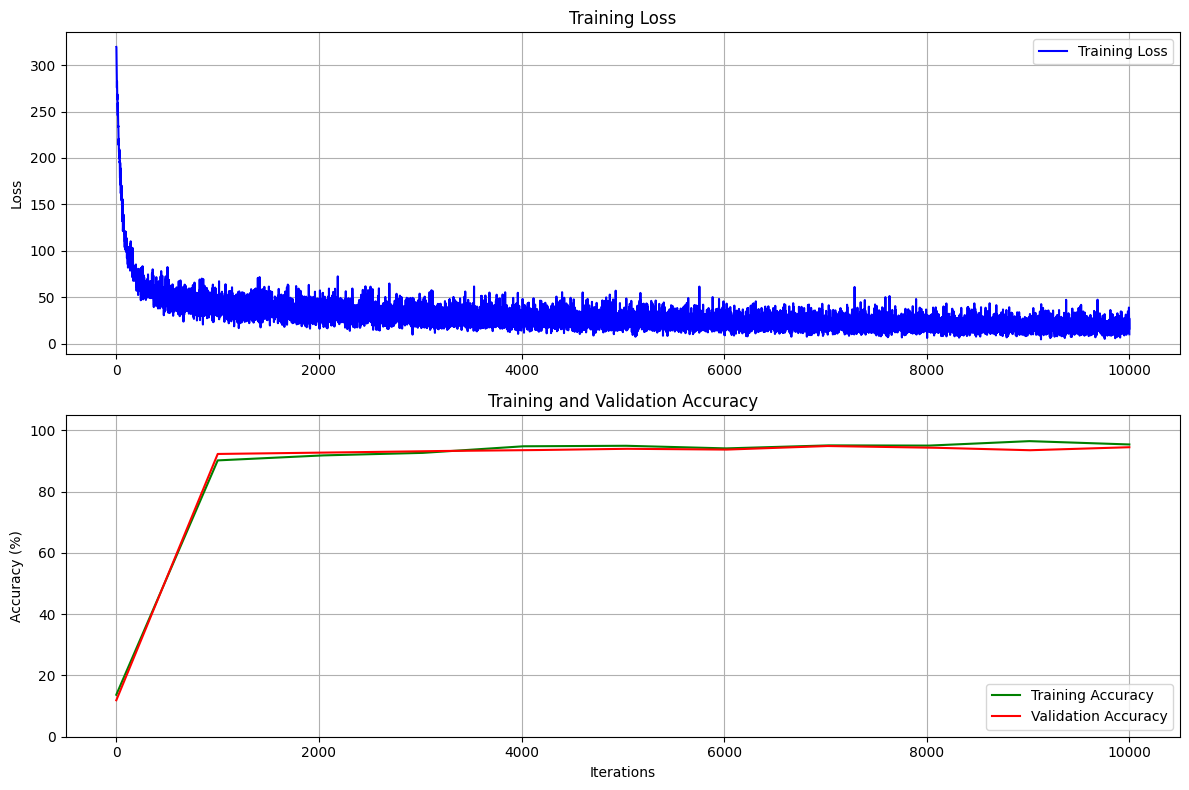

{'loss': [np.float64(319.58480046586993),
  np.float64(319.0743637889479),
  np.float64(311.2265529481695),
  np.float64(296.7400202951644),
  np.float64(291.57853472079347),
  np.float64(291.7748365337404),
  np.float64(275.6154802472503),
  np.float64(282.65149281515744),
  np.float64(276.7972692465093),
  np.float64(273.83707539945965),
  np.float64(263.12965491214925),
  np.float64(268.3749223179746),
  np.float64(261.42021932926406),
  np.float64(247.25455681794983),
  np.float64(245.76178593600793),
  np.float64(259.2457420593279),
  np.float64(252.90411684728778),
  np.float64(240.72137485624333),
  np.float64(244.07832683802124),
  np.float64(233.42161833877682),
  np.float64(234.55642683445606),
  np.float64(222.66999421295782),
  np.float64(222.07274535608153),
  np.float64(213.8785023521227),
  np.float64(220.65121278201428),
  np.float64(212.18356026206533),
  np.float64(207.06268802221385),
  np.float64(205.26524114593394),
  np.float64(201.08541490611984),
  np.float64(20

In [16]:
# Training parameters
iterations = 10000

net.train(iterations, metrics_interval=1000)

## 5. Evaluate the Trained Network

Now let's evaluate the trained model on the test set

In [17]:
# Get the test set
data, labels = net.data_layer.get_test_set()

# Test the network on the test set
results = net.test(data)
accuracy = Helpers.calculate_accuracy(results, labels)
print(f'\nOn the MNIST dataset, our 2-layer network achieves an accuracy of: {accuracy * 100:.2f}%')


On the MNIST dataset, our 2-layer network achieves an accuracy of: 95.13%


## 6. Visualize First Layer Weights

Let's look at what features the first layer has learned to detect by visualizing the weights

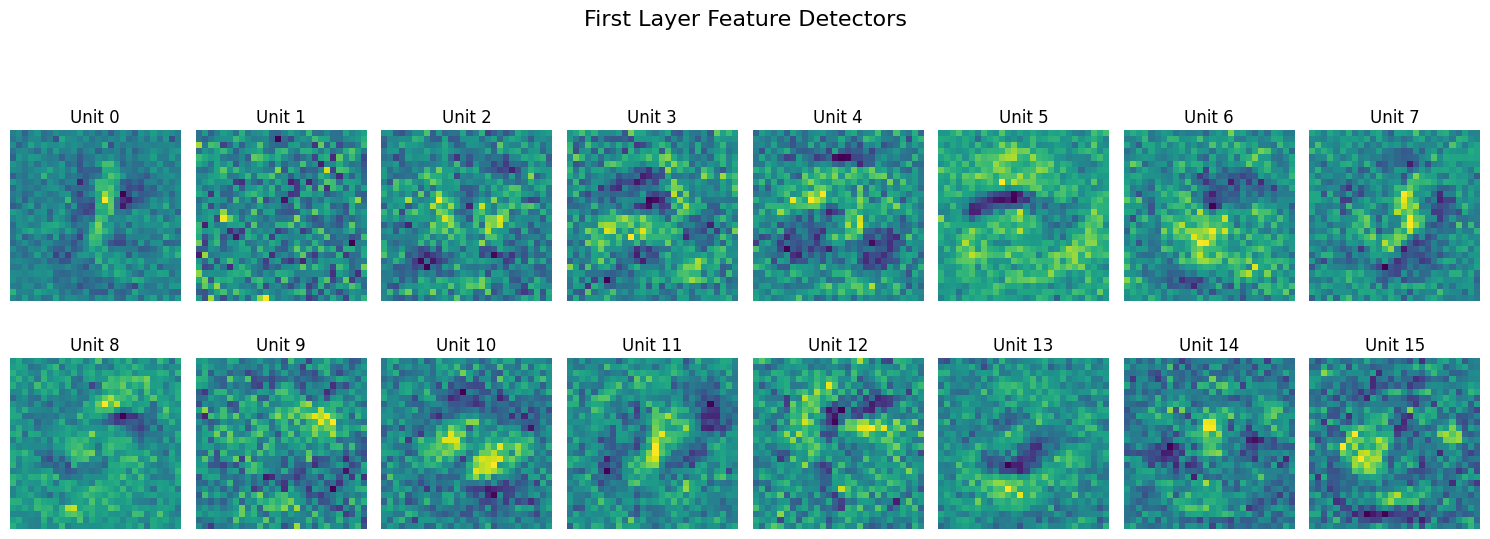

In [18]:
# Get the first fully connected layer (index 1 after the Flatten layer)
fc1_layer = net.layers[1] 
weights = fc1_layer.weights[:-1, :]  # Exclude bias weights

# Reshape weights to visualize as images (784 -> 28x28)
plt.figure(figsize=(15, 6))
plt.suptitle("First Layer Feature Detectors", fontsize=16)

# Display the first 16 hidden units
num_units = min(16, weights.shape[1])
for i in range(num_units):
    plt.subplot(2, 8, i+1)
    # Reshape from 784 to 28x28
    weight_image = weights[:, i].reshape(28, 28)
    plt.imshow(weight_image, cmap='viridis')
    plt.title(f'Unit {i}')
    plt.axis('off')
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 7. Visualize Second Layer Weights

Let's look at how the output layer combines features from the hidden layer

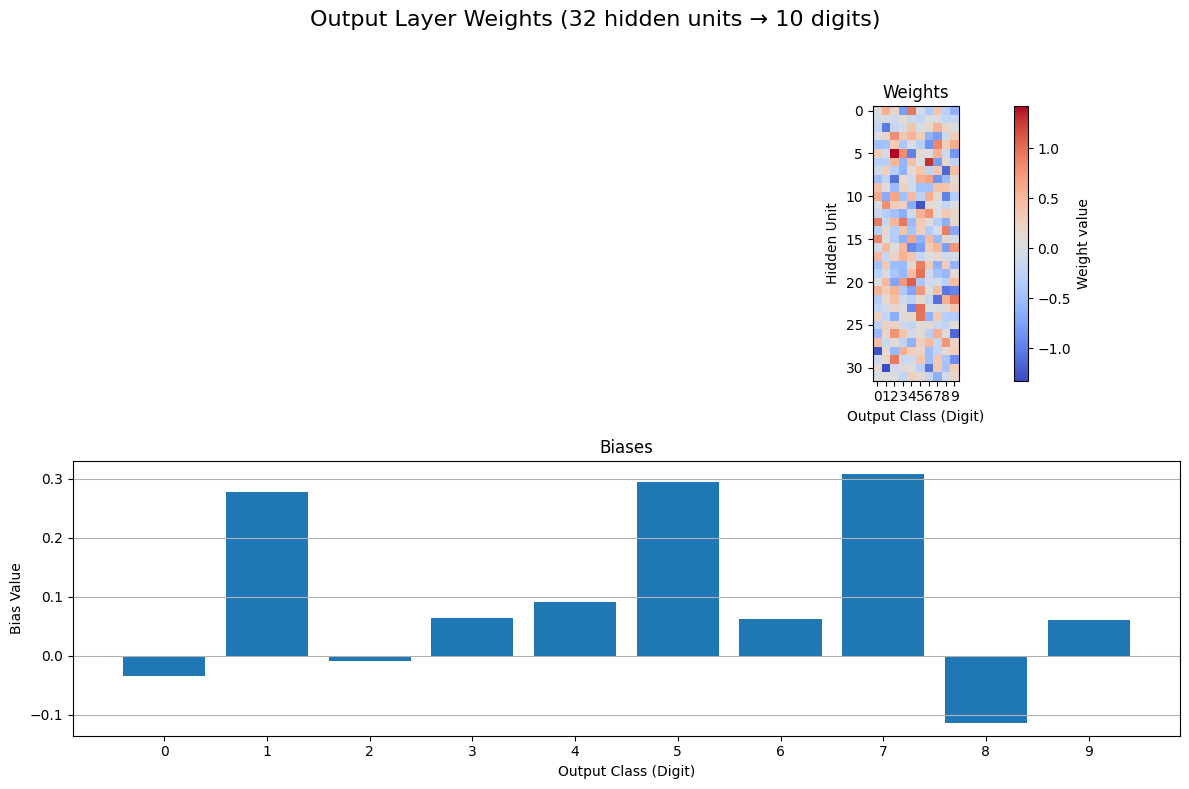

In [19]:
# Get the second fully connected layer (index 3 after Flatten, FC1, and ReLU)
fc2_layer = net.layers[3]
weights = fc2_layer.weights[:-1, :]  # Exclude bias weights
bias = fc2_layer.weights[-1, :]

# Plot the weights as a heatmap
plt.figure(figsize=(12, 8))
plt.suptitle("Output Layer Weights (32 hidden units → 10 digits)", fontsize=16)

# Weight heatmap
plt.subplot(2, 1, 1)
im = plt.imshow(weights, cmap='coolwarm')
plt.colorbar(im, label='Weight value')
plt.xlabel('Output Class (Digit)')
plt.ylabel('Hidden Unit')
plt.title('Weights')
plt.xticks(range(10))

# Bias bar chart
plt.subplot(2, 1, 2)
plt.bar(range(10), bias)
plt.xlabel('Output Class (Digit)')
plt.ylabel('Bias Value')
plt.title('Biases')
plt.xticks(range(10))
plt.grid(True, axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 8. Make Predictions on Test Images

Let's visualize some of the network's predictions on test images

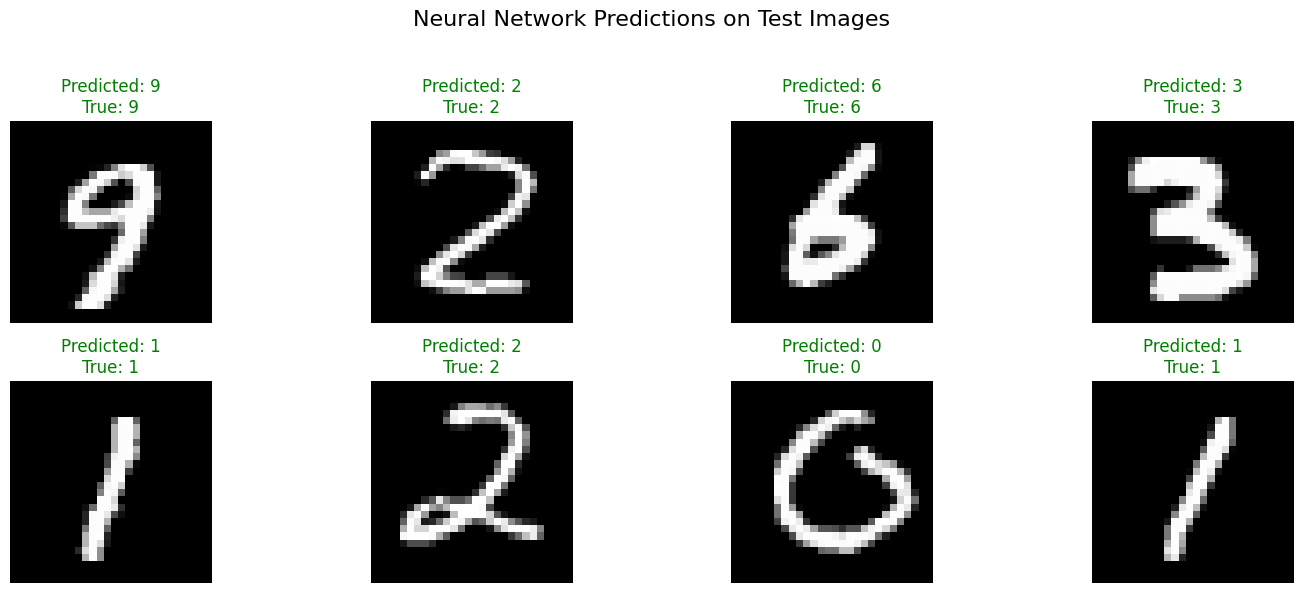

In [20]:
# Get a batch of test images
test_data, test_labels = net.data_layer.get_test_set()
num_samples = 8
sample_indices = np.random.choice(len(test_data), num_samples, replace=False)

# Make predictions
predictions = net.test(test_data[sample_indices])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels[sample_indices], axis=1)

# Plot images with predictions
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(2, 4, i+1)
    img = test_data[sample_indices[i], 0].reshape(28, 28)  # Reshape to 28x28
    plt.imshow(img, cmap='gray')
    
    # Show prediction and true label
    title_color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    plt.title(f'Predicted: {predicted_classes[i]}\nTrue: {true_classes[i]}', color=title_color)
    plt.axis('off')
    
plt.suptitle("Neural Network Predictions on Test Images", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 9. Save the Trained Network

Finally, let's save the trained model

In [22]:
# Create directory if it doesn't exist
os.makedirs('../trained', exist_ok=True)
NeuralNetwork.save(os.path.join('../trained', '2LayerNetwork'), net)
print("Model saved successfully!")

Model saved successfully!
